# Matplotlib 퀴즈

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1) 영화 데이터를 활용하여 x축은 영화, y축은 평점인 막대 그래프를 만드시오

<BarContainer object of 8 artists>

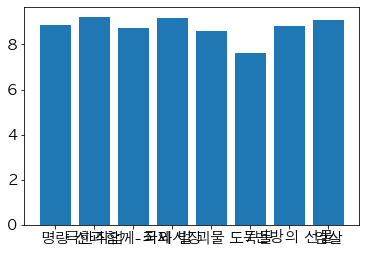

In [72]:
plt.bar(df['영화'], df['평점'])

## 2) 앞에서 만든 막대 그래프에 제시된 세부사항을 적용하시오
 - 제목 : 국내 Top 8 영화 평점 정보
 - x축 label : 영화(90도 회전)
 - y축 label : 평점
 

Text(0, 0.5, '평점')

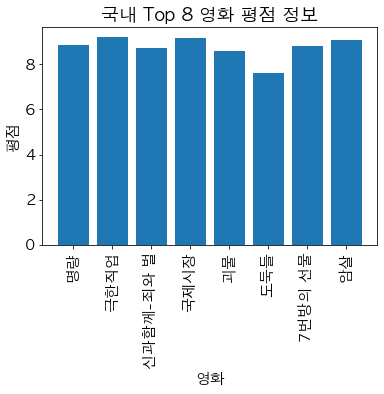

In [73]:
plt.title('국내 Top 8 영화 평점 정보')
plt.bar(df['영화'], df['평점'])
plt.xticks(rotation=90)
plt.xlabel('영화')
plt.ylabel('평점')

## 3) 개봉 연도별 평점 변화 추이를 꺽은선 그래프로 그리시오
### 연도별 평균 데이터를 구하는 코드는 다음과 같습니다.

In [74]:
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [75]:
df.groupby('개봉 연도').mean()

,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


In [76]:
df_group = df.groupby('개봉 연도').mean()
df_group

,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


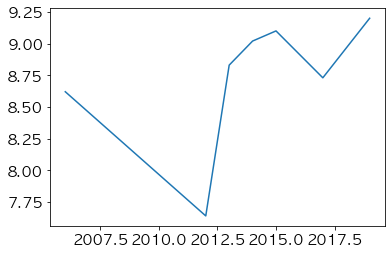

In [77]:
plt.plot(df_group['평점']) # 인덱스(자동으로 x축)가 있는경우 y축 값만 입력해도 됨
# plt.plot(df_group.index, df_group['평점'])  # 인덱스를 x축 으로 사용해도 됨

## 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오
 - marker : 'o'
 - x축 눈금 : 5년 단위( 2005, 2010, 2015, 2020)
 - y축 범위 : 최소 7, 최대 10

(7.0, 10.0)

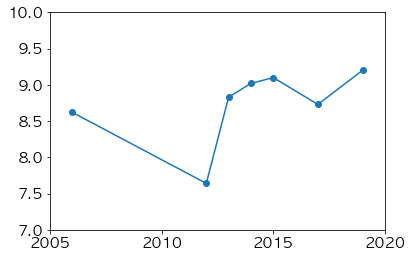

In [78]:
plt.plot(df_group['평점'], marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim(7, 10)

## 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원그래프를 제시된 세부 사항을 적용하여 그리시오
 - label : 9점 이상/9점 미만
 - 퍼센트 : 소수점 첫째 자리까지 표시
 - 범례 : 그래프 우측에 표시

In [79]:
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [80]:
over_9 = df['평점'] > 9
under_9 = df['평점'] <= 9

df[over_9] = '9점 이상'
df[under_9] = '9점 이하'

sep_9 = df.groupby('평점').count()
sep_9

# 강의풀이
# filt = df['평점'] >= 9.0
# values = [len(filt), len(~filt)]
# labels = ['9점 이상', '9점 미만']
# plt.pie(values, labels=labels, autopct='%.1f%%')
# plt.legend(loc=(1, 0.5))

,영화,개봉 연도,관객 수
평점,,,
9점 이상,3,3,3
9점 이하,5,5,5


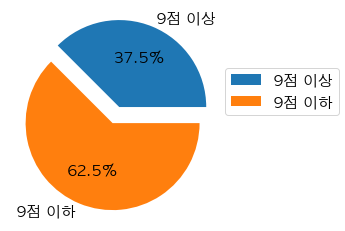

In [82]:
labels = sep_9.index
explode = [0.1] * 2
plt.pie(sep_9['영화'], labels=labels, explode=explode, autopct='%.1f%%')
plt.legend(loc=(1, 0.5))
plt.show()